In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import docx
import sys


In [2]:
print(sys.getrecursionlimit())

3000


In [3]:
sys.setrecursionlimit(10000)

In [4]:
df = pd.read_csv('calls.part1.tsv.gz', sep='\t')
df

,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,CN_STATE
0,chr1,0,5000000,A-AAACCTGAGATCTGCT,2654972,1380,0.787923,25,46,0.647887,0,1|2
1,chr1,0,5000000,A-AAACCTGGTACCGCTG,2654972,545,1.046940,23,21,0.477273,0,1|1
2,chr1,0,5000000,A-AAACCTGGTGCTGTAT,2654972,881,1.210947,21,31,0.596154,0,1|1
3,chr1,0,5000000,A-AAACCTGTCCGCGGAT,2654972,1372,2.324741,34,54,0.613636,0,2|3
4,chr1,0,5000000,A-AAACGGGCATGTATGC,2654972,1019,1.166981,42,24,0.363636,0,1|1
...,...,...,...,...,...,...,...,...,...,...,...,...
2999994,chr8,70000000,75000000,A-CAGCTGGCATTTAGGC,3288642,1489,1.125764,45,47,0.510870,18,2|2
2999995,chr8,70000000,75000000,A-CAGCTGGGTGTAAAGT,3288642,867,0.943443,33,32,0.492308,18,1|1
2999996,chr8,70000000,75000000,A-CAGCTGGTCCTACGAA,3288642,1031,1.169941,31,31,0.500000,18,1|1
2999997,chr8,70000000,75000000,A-CAGGTGCAGAAGGGTA,3288642,1120,1.082494,37,31,0.455882,18,1|1


In [5]:
df_p2 = pd.read_csv('calls.part2.tsv.gz', sep='\t', header=None)

header = ['#CHR', 'START', 'END', 'CELL', 'NORM_COUNT', 'COUNT', 'RDR', 'A_COUNT',
       'B_COUNT', 'BAF', 'CLUSTER', 'CN_STATE']
df_p2.columns = header[:len(df_p2.columns)]
df_p2


#50,285 rows

,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,CN_STATE
0,chr8,70000000,75000000,A-CAGGTGCAGATATGCA,3288642,1861,1.052237,54,47,0.465347,18,1|1
1,chr8,70000000,75000000,A-CAGGTGCAGGTAGCCA,3288642,1478,1.025465,36,39,0.520000,18,1|1
2,chr8,70000000,75000000,A-CAGGTGCCATCTCAAG,3288642,850,1.022228,23,21,0.477273,18,1|1
3,chr8,70000000,75000000,A-CAGGTGCGTTCGCGTG,3288642,782,1.057257,25,34,0.576271,18,1|1
4,chr8,70000000,75000000,A-CAGGTGCTCAGTACAC,3288642,1881,1.069427,59,49,0.453704,18,1|1
...,...,...,...,...,...,...,...,...,...,...,...,...
2815136,chr22,50000000,50818468,E-TTTGTCAAGTAGATGT,488332,409,1.228689,3,3,0.500000,31,2|2
2815137,chr22,50000000,50818468,E-TTTGTCACAATTCACG,488332,132,0.744681,2,7,0.777778,31,2|1
2815138,chr22,50000000,50818468,E-TTTGTCATCGAAATCC,488332,212,0.866534,4,4,0.500000,31,1|1
2815139,chr22,50000000,50818468,E-TTTGTCATCGAACAAA,488332,186,1.249646,3,3,0.500000,31,2|2


In [6]:
df = df.append(df_p2)

/var/folders/zj/ww00cy3n0dg4jg01vzxf6z6w0000gp/T/ipykernel_10014/199051844.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_p2)


In [7]:
df['CHR'] = df['#CHR'].str.replace('chr','').astype(int) #CHR COLUMN

df['TOTAL_CN'] = df['CN_STATE'].str.split('|', expand=True).astype(int).sum(axis=1)  #TOTAL CN COLUMN (using corrected HAP_CN column, ask Simone)

In [8]:
df

,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,CN_STATE,CHR,TOTAL_CN
0,chr1,0,5000000,A-AAACCTGAGATCTGCT,2654972,1380,0.787923,25,46,0.647887,0,1|2,1,3
1,chr1,0,5000000,A-AAACCTGGTACCGCTG,2654972,545,1.046940,23,21,0.477273,0,1|1,1,2
2,chr1,0,5000000,A-AAACCTGGTGCTGTAT,2654972,881,1.210947,21,31,0.596154,0,1|1,1,2
3,chr1,0,5000000,A-AAACCTGTCCGCGGAT,2654972,1372,2.324741,34,54,0.613636,0,2|3,1,5
4,chr1,0,5000000,A-AAACGGGCATGTATGC,2654972,1019,1.166981,42,24,0.363636,0,1|1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815136,chr22,50000000,50818468,E-TTTGTCAAGTAGATGT,488332,409,1.228689,3,3,0.500000,31,2|2,22,4
2815137,chr22,50000000,50818468,E-TTTGTCACAATTCACG,488332,132,0.744681,2,7,0.777778,31,2|1,22,3
2815138,chr22,50000000,50818468,E-TTTGTCATCGAAATCC,488332,212,0.866534,4,4,0.500000,31,1|1,22,2
2815139,chr22,50000000,50818468,E-TTTGTCATCGAACAAA,488332,186,1.249646,3,3,0.500000,31,2|2,22,4


In [9]:
len(df['CELL'].unique())  #10,202 unique cells

10202

------------------------------------------------------------------------------------------------------------------------------------------------

Heatmap showing genome-wide RDRs of all cells in the BC_DF

In [10]:
pt_RDR = pd.pivot_table(data=df, index='CELL', columns= ['CHR', 'START', 'END'], values='RDR')
pt_RDR = pt_RDR.fillna(0)
pt_RDR

CHR                       1                                           \
START               0         5000000   10000000  15000000  20000000   
END                 5000000   10000000  15000000  20000000  25000000   
CELL                                                                   
A-AAACCTGAGATCTGCT  0.787923  0.850312  0.833157  0.894863  0.818265   
A-AAACCTGGTACCGCTG  1.046940  1.128737  0.972953  1.035348  1.022042   
A-AAACCTGGTGCTGTAT  1.210947  1.019439  1.016033  1.138493  0.975454   
A-AAACCTGTCCGCGGAT  2.324741  1.956783  1.929784  2.368522  3.313763   
A-AAACGGGCATGTATGC  1.166981  1.082086  1.018985  1.133176  1.128740   
...                      ...       ...       ...       ...       ...   
E-TTTGTCAAGTAGATGT  0.897899  0.872491  0.850169  0.806180  0.845727   
E-TTTGTCACAATTCACG  0.829084  0.808253  0.812480  0.781418  0.892082   
E-TTTGTCATCGAAATCC  0.969828  0.975787  1.048340  0.898642  1.036601   
E-TTTGTCATCGAACAAA  1.067685  0.903963  0.898796  0.941832  0.918532   
E-TTTGTCATCGTAACCA  1.037636  1.070699  1.059068  1.024921  1.039708   

CHR                                                                   ...  \
START               25000000  30000000  35000000  40000000  45000000  ...   
END                 30000000  35000000  40000000  45000000  50000000  ...   
CELL                                                                  ...   
A-AAACCTGAGATCTGCT  0.867985  0.824578  0.821688  0.891740  0.868139  ...   
A-AAACCTGGTACCGCTG  1.016636  1.071961  0.987347  0.932424  1.015585  ...   
A-AAACCTGGTGCTGTAT  1.107780  1.075932  1.009242  1.074559  0.767512  ...   
A-AAACCTGTCCGCGGAT  2.779562  2.516579  1.367082  2.228616  0.627801  ...   
A-AAACGGGCATGTATGC  1.065591  1.047162  1.013017  0.998609  0.973728  ...   
...                      ...       ...       ...       ...       ...  ...   
E-TTTGTCAAGTAGATGT  0.833315  0.866936  0.937916  0.884355  0.924652  ...   
E-TTTGTCACAATTCACG  0.763607  0.844168  0.821956  0.874501  0.896775  ...   
E-TTTGTCATCGAAATCC  1.020038  0.990029  0.964403  0.988826  1.120121  ...   
E-TTTGTCATCGAACAAA  0.833513  0.843755  0.815549  0.752688  0.808810  ...   
E-TTTGTCATCGTAACCA  1.090622  1.066832  1.101258  1.105484  1.087933  ...   

CHR                       21        22                                \
START               45000000  10000000  15000000  20000000  25000000   
END                 46709983  15000000  20000000  25000000  30000000   
CELL                                                                   
A-AAACCTGAGATCTGCT  1.035740  1.194241  1.009497  1.080057  0.755228   
A-AAACCTGGTACCGCTG  1.075132  1.004506  0.993115  1.041269  1.057202   
A-AAACCTGGTGCTGTAT  1.214656  0.971746  1.176432  1.159251  1.080818   
A-AAACCTGTCCGCGGAT  2.899044  1.410557  2.427439  3.353141  2.332748   
A-AAACGGGCATGTATGC  1.169458  0.991693  1.036758  1.132107  1.008222   
...                      ...       ...       ...       ...       ...   
E-TTTGTCAAGTAGATGT  1.033548  1.039013  1.071539  1.247790  0.684691   
E-TTTGTCACAATTCACG  1.118196  1.039619  0.767713  0.833199  0.721058   
E-TTTGTCATCGAAATCC  0.826770  0.967091  0.861116  1.021548  0.933555   
E-TTTGTCATCGAACAAA  1.085960  1.039064  1.179755  1.134176  0.768321   
E-TTTGTCATCGTAACCA  1.129020  0.913836  1.004839  1.036402  1.075958   

CHR                                                                   
START               30000000  35000000  40000000  45000000  50000000  
END                 35000000  40000000  45000000  50000000  50818468  
CELL                                                                  
A-AAACCTGAGATCTGCT  0.617749  0.987630  1.115562  1.080044  0.996448  
A-AAACCTGGTACCGCTG  1.029953  1.144858  0.981436  1.018402  1.159293  
A-AAACCTGGTGCTGTAT  0.928419  1.103591  1.030875  1.023291  1.053690  
A-AAACCTGTCCGCGGAT  2.977774  2.180471  3.192636  2.799404  3.823079  
A-AAACGGGCATGTATGC  1.192922  1.134923  1.125034  1.095256  1.058481  
...                      ...       ...     

Before I make finished heatmap, need to add chromosome axis

In [11]:
chromosome_colours= {1:'black', 2:'gray', 3:'black', 4:'gray', 5:'black', 6:'gray',
                     7:'black', 8:'gray', 9:'black', 10:'gray', 11:'black', 12:'gray',
                     13:'black', 14:'gray', 15:'black', 16:'gray', 17:'black', 18:'gray',
                     19:'black', 20:'gray', 21:'black', 22:'gray'}
#making a dictionary corresponding to the chromosomes and the colours we want them to be in the heatmap


df['COLOUR']=df['CHR'].map(chromosome_colours) #adding a column to the df called colours, where colour mapped to the chromosome

#new df called df_colours, 

df_colours=df[['CHR', 'START', 'END', 'COLOUR']]

chrome_colours = df_colours.drop_duplicates().set_index(['CHR', 'START', 'END'])
chrome_colours


COLOUR
CHR START    END            
1   0        5000000   black
    5000000  10000000  black
    10000000 15000000  black
    15000000 20000000  black
    20000000 25000000  black
...                      ...
22  30000000 35000000   gray
    35000000 40000000   gray
    40000000 45000000   gray
    45000000 50000000   gray
    50000000 50818468   gray

[570 rows x 1 columns]

/Users/elise/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1200x600 with 0 Axes>

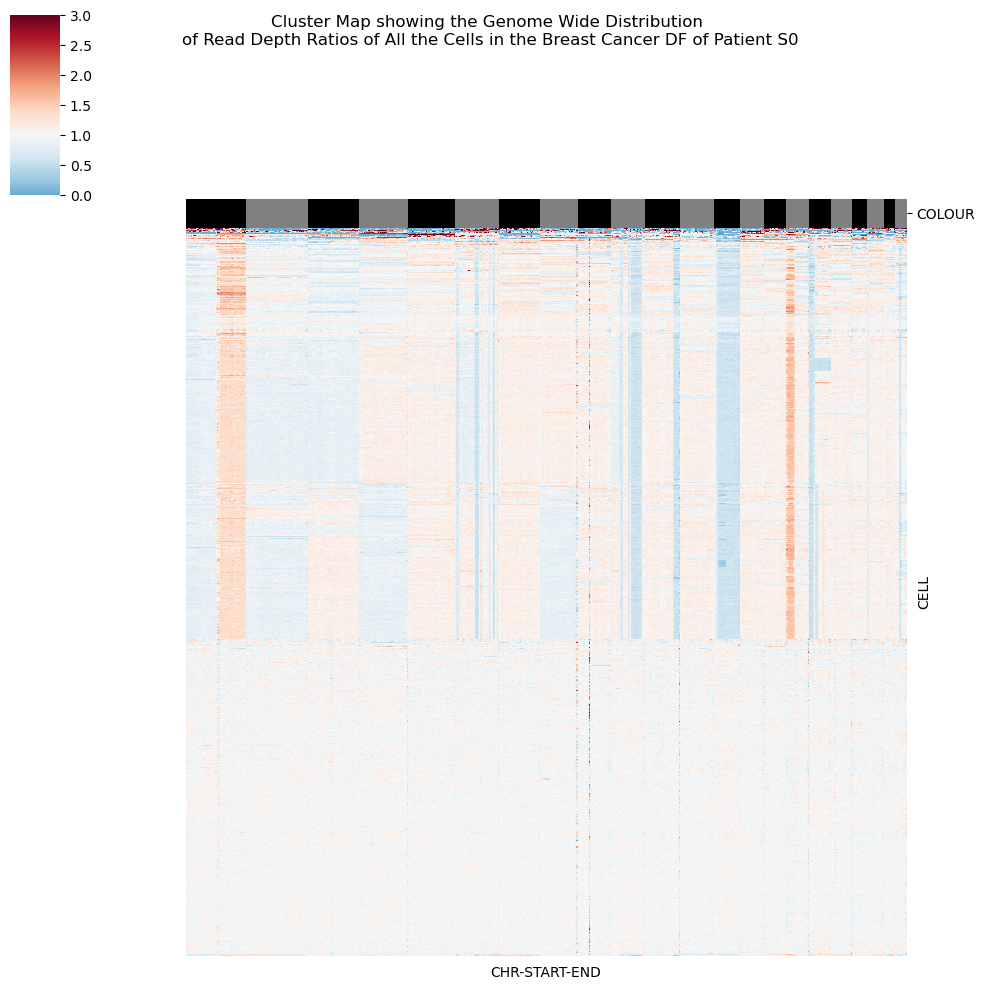

In [12]:
plt.figure(figsize= (12, 6))

genome_RDR_heatmap = sns.clustermap(data = pt_RDR, vmin=0, vmax=3,cmap='RdBu_r', center=1, xticklabels= False, 
                                    yticklabels = False, col_cluster= False, col_colors=chrome_colours)
genome_RDR_heatmap.ax_row_dendrogram.set_visible(False)

cbar_kws={"orientation": "horizontal", "pad":0.02}

genome_RDR_heatmap.fig.suptitle("""Cluster Map showing the Genome Wide Distribution 
of Read Depth Ratios of All the Cells in the Breast Cancer DF of Patient S0""")

genome_RDR_heatmap

plt.savefig('BC_PS0_Genome_RDR.png', dpi=300)

Aim: Make a plot showing genome-wide HDs of all cells in the BC DF

In [13]:
df

,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,CN_STATE,CHR,TOTAL_CN,COLOUR
0,chr1,0,5000000,A-AAACCTGAGATCTGCT,2654972,1380,0.787923,25,46,0.647887,0,1|2,1,3,black
1,chr1,0,5000000,A-AAACCTGGTACCGCTG,2654972,545,1.046940,23,21,0.477273,0,1|1,1,2,black
2,chr1,0,5000000,A-AAACCTGGTGCTGTAT,2654972,881,1.210947,21,31,0.596154,0,1|1,1,2,black
3,chr1,0,5000000,A-AAACCTGTCCGCGGAT,2654972,1372,2.324741,34,54,0.613636,0,2|3,1,5,black
4,chr1,0,5000000,A-AAACGGGCATGTATGC,2654972,1019,1.166981,42,24,0.363636,0,1|1,1,2,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815136,chr22,50000000,50818468,E-TTTGTCAAGTAGATGT,488332,409,1.228689,3,3,0.500000,31,2|2,22,4,gray
2815137,chr22,50000000,50818468,E-TTTGTCACAATTCACG,488332,132,0.744681,2,7,0.777778,31,2|1,22,3,gray
2815138,chr22,50000000,50818468,E-TTTGTCATCGAAATCC,488332,212,0.866534,4,4,0.500000,31,1|1,22,2,gray
2815139,chr22,50000000,50818468,E-TTTGTCATCGAACAAA,488332,186,1.249646,3,3,0.500000,31,2|2,22,4,gray


In [14]:
df['HOMO_DEL'] = np.where(df['RDR'] <= 0.01350, True, False)
df

,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,CN_STATE,CHR,TOTAL_CN,COLOUR,HOMO_DEL
0,chr1,0,5000000,A-AAACCTGAGATCTGCT,2654972,1380,0.787923,25,46,0.647887,0,1|2,1,3,black,False
1,chr1,0,5000000,A-AAACCTGGTACCGCTG,2654972,545,1.046940,23,21,0.477273,0,1|1,1,2,black,False
2,chr1,0,5000000,A-AAACCTGGTGCTGTAT,2654972,881,1.210947,21,31,0.596154,0,1|1,1,2,black,False
3,chr1,0,5000000,A-AAACCTGTCCGCGGAT,2654972,1372,2.324741,34,54,0.613636,0,2|3,1,5,black,False
4,chr1,0,5000000,A-AAACGGGCATGTATGC,2654972,1019,1.166981,42,24,0.363636,0,1|1,1,2,black,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815136,chr22,50000000,50818468,E-TTTGTCAAGTAGATGT,488332,409,1.228689,3,3,0.500000,31,2|2,22,4,gray,False
2815137,chr22,50000000,50818468,E-TTTGTCACAATTCACG,488332,132,0.744681,2,7,0.777778,31,2|1,22,3,gray,False
2815138,chr22,50000000,50818468,E-TTTGTCATCGAAATCC,488332,212,0.866534,4,4,0.500000,31,1|1,22,2,gray,False
2815139,chr22,50000000,50818468,E-TTTGTCATCGAACAAA,488332,186,1.249646,3,3,0.500000,31,2|2,22,4,gray,False


DF to show how many rows have HDs

In [15]:
df_HD=df[df['HOMO_DEL'] == True]
df_HD

#232 regions

,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,CN_STATE,CHR,TOTAL_CN,COLOUR,HOMO_DEL
267,chr1,0,5000000,A-ACTGTCCAGCATTCAC,0,0,0.000000,0,0,0.5,0,0|0,1,0,black,True
2379,chr1,0,5000000,B-ACGATGTCATTTAGGC,0,0,0.000000,0,0,0.5,0,0|0,1,0,black,True
2921,chr1,0,5000000,B-CCATTCGTCGTGTGGC,2654972,2,0.005123,0,0,0.5,0,1|0,1,1,black,True
3148,chr1,0,5000000,B-CGTAGCGAGTGACTCT,2654972,4,0.008548,0,0,0.5,0,1|1,1,2,black,True
3612,chr1,0,5000000,B-GCGCCAATCAGTAAAG,0,0,0.000000,0,0,0.5,0,0|0,1,0,black,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2814366,chr22,50000000,50818468,E-GCTGCGAGTAACGACG,0,0,0.000000,0,0,0.5,31,0|0,22,0,gray,True
2814454,chr22,50000000,50818468,E-GGGAATGGTAGGCTGA,0,0,0.000000,0,0,0.5,31,0|0,22,0,gray,True
2814608,chr22,50000000,50818468,E-GTGTTAGAGAGAGCTC,0,0,0.000000,0,0,0.5,31,0|0,22,0,gray,True
2814662,chr22,50000000,50818468,E-TAAGTGCGTAGATGCG,0,0,0.000000,0,0,0.5,31,0|0,22,0,gray,True


In [16]:
HD_table = pd.pivot_table(data=df, index='CELL', columns=['CHR', 'START', 'END'], values= 'HOMO_DEL') 
HD_table

CHR                      1                                                \
START              0        5000000  10000000 15000000 20000000 25000000   
END                5000000  10000000 15000000 20000000 25000000 30000000   
CELL                                                                       
A-AAACCTGAGATCTGCT      0.0      0.0      0.0      0.0      0.0      0.0   
A-AAACCTGGTACCGCTG      0.0      0.0      0.0      0.0      0.0      0.0   
A-AAACCTGGTGCTGTAT      0.0      0.0      0.0      0.0      0.0      0.0   
A-AAACCTGTCCGCGGAT      0.0      0.0      0.0      0.0      0.0      0.0   
A-AAACGGGCATGTATGC      0.0      0.0      0.0      0.0      0.0      0.0   
...                     ...      ...      ...      ...      ...      ...   
E-TTTGTCAAGTAGATGT      0.0      0.0      0.0      0.0      0.0      0.0   
E-TTTGTCACAATTCACG      0.0      0.0      0.0      0.0      0.0      0.0   
E-TTTGTCATCGAAATCC      0.0      0.0      0.0      0.0      0.0      0.0   
E-TTTGTCATCGAACAAA      0.0      0.0      0.0      0.0      0.0      0.0   
E-TTTGTCATCGTAACCA      0.0      0.0      0.0      0.0      0.0      0.0   

CHR                                                     ...       21       22  \
START              30000000 35000000 40000000 45000000  ... 45000000 10000000   
END                35000000 40000000 45000000 50000000  ... 46709983 15000000   
CELL                                                    ...                     
A-AAACCTGAGATCTGCT      0.0      0.0      0.0      0.0  ...      0.0      0.0   
A-AAACCTGGTACCGCTG      0.0      0.0      0.0      0.0  ...      0.0      0.0   
A-AAACCTGGTGCTGTAT      0.0      0.0      0.0      0.0  ...      0.0      0.0   
A-AAACCTGTCCGCGGAT      0.0      0.0      0.0      0.0  ...      0.0      0.0   
A-AAACGGGCATGTATGC      0.0      0.0      0.0      0.0  ...      0.0      0.0   
...                     ...      ...      ...      ...  ...      ...      ...   
E-TTTGTCAAGTAGATGT      0.0      0.0      0.0      0.0  ...      0.0      0.0   
E-TTTGTCACAATTCACG      0.0      0.0      0.0      0.0  ...      0.0      0.0   
E-TTTGTCATCGAAATCC      0.0      0.0      0.0      0.0  ...      0.0      0.0   
E-TTTGTCATCGAACAAA      0.0      0.0      0.0      0.0  ...      0.0      0.0   
E-TTTGTCATCGTAACCA      0.0      0.0      0.0      0.0  ...      0.0      0.0   

CHR                                                                       \
START              15000000 20000000 25000000 30000000 35000000 40000000   
END                20000000 25000000 30000000 35000000 40000000 45000000   
CELL                                                                       
A-AAACCTGAGATCTGCT      0.0      0.0      0.0      0.0      0.0      0.0   
A-AAACCTGGTACCGCTG      0.0      0.0      0.0      0.0      0.0      0.0   
A-AAACCTGGTGCTGTAT      0.0      0.0      0.0      0.0      0.0      0.0   
A-AAACCTGTCCGCGGAT      0.0      0.0      0.0      0.0      0.0      0.0   
A-AAACGGGCATGTATGC      0.0      0.0      0.0      0.0      0.0      0.0   
...                     ...      ...      ...      ...      ...      ...   
E-TTTGTCAAGTAGATGT      0.0      0.0      0.0      0.0      0.0      0.0   
E-TTTGTCACAATTCACG      0.0      0.0      0.0      0.0      0.0      0.0   
E-TTTGTCATCGAAATCC      0.0      0.0      0.0      0.0      0.0      0.0   
E-TTTGTCATCGAACAAA      0.0      0.0      0.0      0.0      0.0      0.0   
E-TTTGTCATCGTAACCA      0.0      0.0      0.0      0.0      0.0      0.0   

CHR                                   
START              45000000 50000000  
END                50000000 50818468  
CELL                                  
A-AAACCTGAGATCTGCT      0.0      0.0  
A-AAACCTGGTACCGCTG      0.0      0.0  
A-AAACCTGGTGCTGTAT      0.0      0.0  
A-AAACCTGTCCGCGGAT      0.0      0.0  
A-AAACGGGCATGTATGC      0.0      0.0  
...                     ...      ...  
E-TTTGTCAAGTAGATGT      0.0      0.0  
E-TTTGTCACAATTCACG      0.0      0.0  
E-TTTGTCATCGAAATCC      0.0      0

/Users/elise/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1200x600 with 0 Axes>

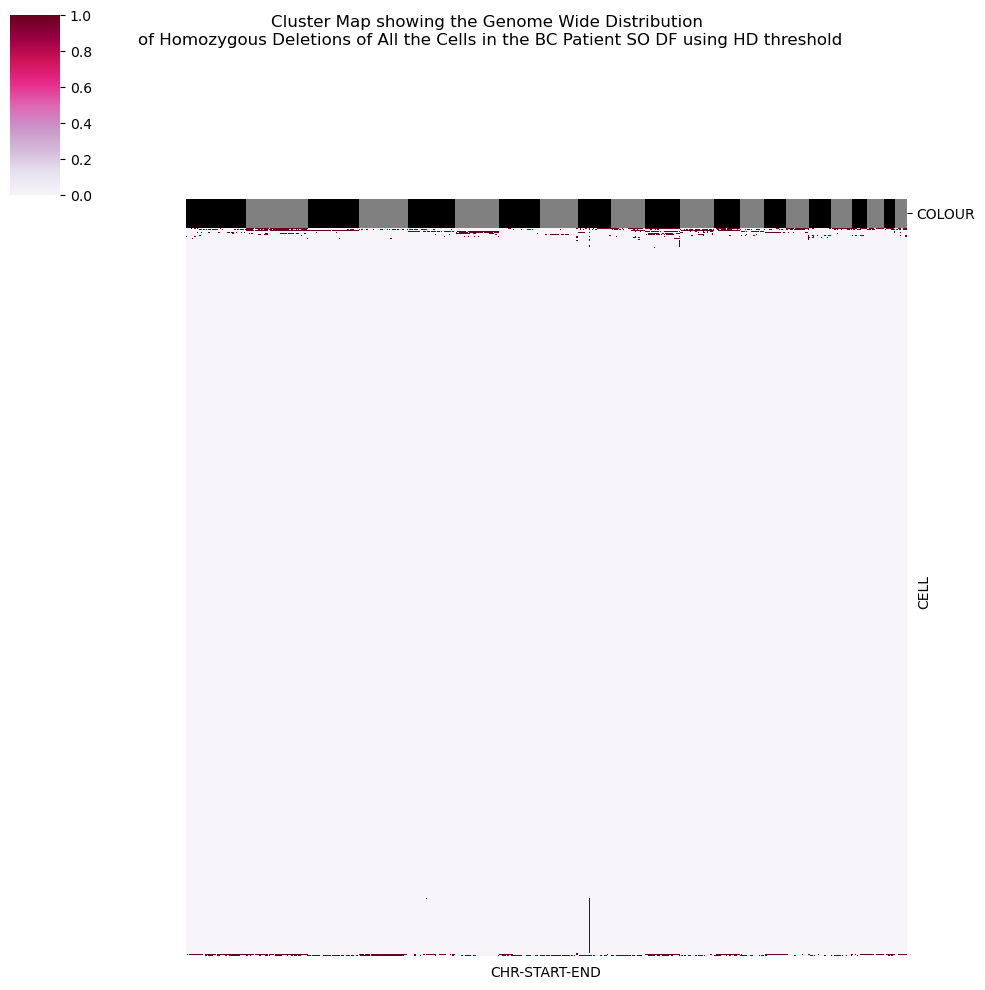

In [17]:
plt.figure(figsize=(12, 6))
HD_heatmap = sns.clustermap(data=HD_table, vmin=0, vmax=1, cmap='PuRd', xticklabels=False, 
                            yticklabels=False, col_cluster=False, row_cluster = True, col_colors=chrome_colours)

HD_heatmap.ax_row_dendrogram.set_visible(False)
HD_heatmap.fig.suptitle("""Cluster Map showing the Genome Wide Distribution 
of Homozygous Deletions of All the Cells in the BC Patient SO DF using HD threshold""")
HD_heatmap

plt.savefig('S0_BC_Appendix_HD.png', dpi=300)

OOOOH INTERESTING

AIM: Heatmap that shows genome-wide distribution of HDs in cells in BC DF that contain at least 1 HD

In [18]:
len(df_HD['CELL'].unique())

1077

In [19]:
unique_HD =df_HD['CELL'].unique()
print(unique_HD) 

['A-ACTGTCCAGCATTCAC' 'B-ACGATGTCATTTAGGC' 'B-CCATTCGTCGTGTGGC' ...
 'B-GGAACTTTCGCCAACG' 'B-GAGCAGAGTCGAGTAG' 'E-CCTTCCCTCGGGTCCA']


In [20]:
cells_w_HD = df[df['CELL'].isin(unique_HD)]
cells_w_HD

,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,CN_STATE,CHR,TOTAL_CN,COLOUR,HOMO_DEL
3,chr1,0,5000000,A-AAACCTGTCCGCGGAT,2654972,1372,2.324741,34,54,0.613636,0,2|3,1,5,black,False
4,chr1,0,5000000,A-AAACGGGCATGTATGC,2654972,1019,1.166981,42,24,0.363636,0,1|1,1,2,black,False
13,chr1,0,5000000,A-AAAGATGTCTCATGTT,2654972,813,1.125003,35,17,0.326923,0,3|1,1,4,black,False
19,chr1,0,5000000,A-AAAGCAAGTACCTTGA,2654972,558,1.115607,14,19,0.575758,0,1|1,1,2,black,False
31,chr1,0,5000000,A-AAATGCCTCCCTAAGA,2654972,510,1.074336,14,10,0.416667,0,1|1,1,2,black,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815104,chr22,50000000,50818468,E-TTGGCAAAGCGTGTGA,488332,131,1.070575,3,4,0.571429,31,1|1,22,2,gray,False
2815108,chr22,50000000,50818468,E-TTGTAGGCAACGACAG,488332,96,0.866692,3,3,0.500000,31,1|1,22,2,gray,False
2815118,chr22,50000000,50818468,E-TTTATGCCAAATCGCT,488332,187,0.915018,6,2,0.250000,31,1|2,22,3,gray,False
2815126,chr22,50000000,50818468,E-TTTGCGCGTGATATGA,488332,144,0.919862,3,4,0.571429,31,2|1,22,3,gray,False


In [21]:
HD_updated_table = pd.pivot_table(data=cells_w_HD, index='CELL', columns=['CHR', 'START', 'END'], values= 'HOMO_DEL') 
HD_updated_table

CHR                      1                                                \
START              0        5000000  10000000 15000000 20000000 25000000   
END                5000000  10000000 15000000 20000000 25000000 30000000   
CELL                                                                       
A-AAACCTGTCCGCGGAT      0.0      0.0      0.0      0.0      0.0      0.0   
A-AAACGGGCATGTATGC      0.0      0.0      0.0      0.0      0.0      0.0   
A-AAAGATGTCTCATGTT      0.0      0.0      0.0      0.0      0.0      0.0   
A-AAAGCAAGTACCTTGA      0.0      0.0      0.0      0.0      0.0      0.0   
A-AAATGCCTCCCTAAGA      0.0      0.0      0.0      0.0      0.0      0.0   
...                     ...      ...      ...      ...      ...      ...   
E-TTGGCAAAGCGTGTGA      0.0      0.0      0.0      0.0      0.0      0.0   
E-TTGTAGGCAACGACAG      0.0      0.0      0.0      0.0      0.0      0.0   
E-TTTATGCCAAATCGCT      0.0      0.0      0.0      0.0      0.0      0.0   
E-TTTGCGCGTGATATGA      0.0      0.0      0.0      0.0      0.0      0.0   
E-TTTGGTTAGTGCCATT      0.0      0.0      0.0      0.0      0.0      0.0   

CHR                                                     ...       21       22  \
START              30000000 35000000 40000000 45000000  ... 45000000 10000000   
END                35000000 40000000 45000000 50000000  ... 46709983 15000000   
CELL                                                    ...                     
A-AAACCTGTCCGCGGAT      0.0      0.0      0.0      0.0  ...      0.0      0.0   
A-AAACGGGCATGTATGC      0.0      0.0      0.0      0.0  ...      0.0      0.0   
A-AAAGATGTCTCATGTT      0.0      0.0      0.0      0.0  ...      0.0      0.0   
A-AAAGCAAGTACCTTGA      0.0      0.0      0.0      0.0  ...      0.0      0.0   
A-AAATGCCTCCCTAAGA      0.0      0.0      0.0      0.0  ...      0.0      0.0   
...                     ...      ...      ...      ...  ...      ...      ...   
E-TTGGCAAAGCGTGTGA      0.0      0.0      0.0      0.0  ...      0.0      0.0   
E-TTGTAGGCAACGACAG      0.0      0.0      0.0      0.0  ...      0.0      0.0   
E-TTTATGCCAAATCGCT      0.0      0.0      0.0      0.0  ...      0.0      0.0   
E-TTTGCGCGTGATATGA      0.0      0.0      0.0      0.0  ...      0.0      0.0   
E-TTTGGTTAGTGCCATT      0.0      0.0      0.0      0.0  ...      0.0      0.0   

CHR                                                                       \
START              15000000 20000000 25000000 30000000 35000000 40000000   
END                20000000 25000000 30000000 35000000 40000000 45000000   
CELL                                                                       
A-AAACCTGTCCGCGGAT      0.0      0.0      0.0      0.0      0.0      0.0   
A-AAACGGGCATGTATGC      0.0      0.0      0.0      0.0      0.0      0.0   
A-AAAGATGTCTCATGTT      0.0      0.0      0.0      0.0      0.0      0.0   
A-AAAGCAAGTACCTTGA      0.0      0.0      0.0      0.0      0.0      0.0   
A-AAATGCCTCCCTAAGA      0.0      0.0      0.0      0.0      0.0      0.0   
...                     ...      ...      ...      ...      ...      ...   
E-TTGGCAAAGCGTGTGA      0.0      0.0      0.0      0.0      0.0      0.0   
E-TTGTAGGCAACGACAG      0.0      0.0      0.0      0.0      0.0      0.0   
E-TTTATGCCAAATCGCT      0.0      0.0      0.0      0.0      0.0      0.0   
E-TTTGCGCGTGATATGA      0.0      0.0      0.0      0.0      0.0      0.0   
E-TTTGGTTAGTGCCATT      0.0      0.0      0.0      0.0      0.0      0.0   

CHR                                   
START              45000000 50000000  
END                50000000 50818468  
CELL                                  
A-AAACCTGTCCGCGGAT      0.0      0.0  
A-AAACGGGCATGTATGC      0.0      0.0  
A-AAAGATGTCTCATGTT      0.0      0.0  
A-AAAGCAAGTACCTTGA      0.0      0.0  
A-AAATGCCTCCCTAAGA      0.0      0.0  
...                     ...      ...  
E-TTGGCAAAGCGTGTGA      0.0      0.0  
E-TTGTAGGCAACGACAG      0.0      0.0  
E-TTTATGCCAAATCGCT      0.0      0

/Users/elise/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1200x600 with 0 Axes>

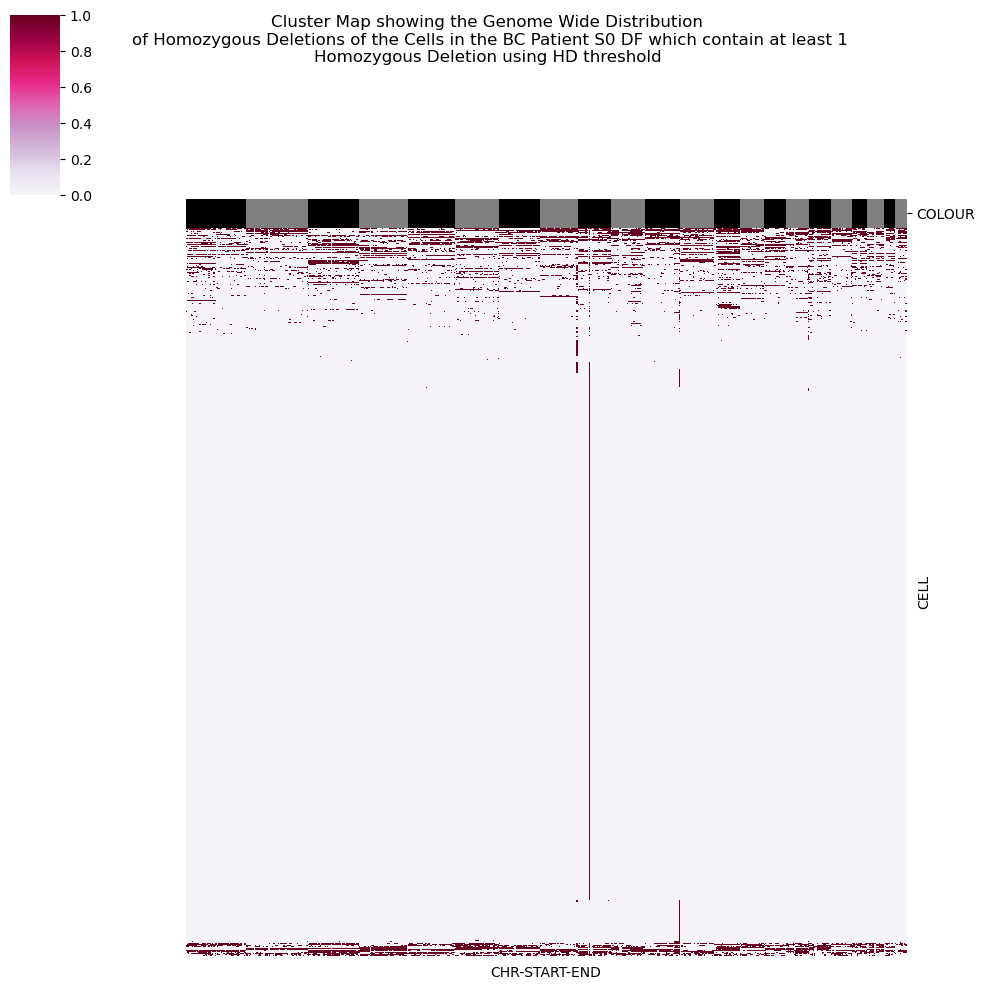

In [22]:
plt.figure(figsize=(12, 6))

HD_heatmap_2 = sns.clustermap(data=HD_updated_table, vmin=0, vmax=1, cmap='PuRd', xticklabels=False, yticklabels=False, 
                              col_cluster=False, row_cluster = True, col_colors=chrome_colours)
HD_heatmap_2.ax_row_dendrogram.set_visible(False)
HD_heatmap_2.fig.suptitle("""Cluster Map showing the Genome Wide Distribution 
of Homozygous Deletions of the Cells in the BC Patient S0 DF which contain at least 1
Homozygous Deletion using HD threshold """)
HD_heatmap_2

plt.savefig('BC_PS0_Genome_HD_At_Least_One_Cell.png', dpi=300)

Show total no. HDs that each cell contains

In [23]:
cells_w_HD.groupby('CELL')['HOMO_DEL'].sum() #showing totla no. hDs for each cell throughout genome

CELL
A-AAACCTGTCCGCGGAT    173
A-AAACGGGCATGTATGC      1
A-AAAGATGTCTCATGTT      1
A-AAAGCAAGTACCTTGA      1
A-AAATGCCTCCCTAAGA      1
                     ... 
E-TTGGCAAAGCGTGTGA      1
E-TTGTAGGCAACGACAG      1
E-TTTATGCCAAATCGCT      1
E-TTTGCGCGTGATATGA      1
E-TTTGGTTAGTGCCATT      1
Name: HOMO_DEL, Length: 1077, dtype: int64

Shows total no. HDs that each genomic region contains

In [24]:
group_HD =cells_w_HD.groupby(['CHR', 'START', 'END'])['HOMO_DEL'].sum() 
group_HD

CHR  START     END     
1    0         5000000     13
     5000000   10000000    34
     10000000  15000000    32
     15000000  20000000    35
     20000000  25000000    43
                           ..
22   30000000  35000000    44
     35000000  40000000    32
     40000000  45000000    36
     45000000  50000000    33
     50000000  50818468    45
Name: HOMO_DEL, Length: 570, dtype: int64

creating column called cells w/ HD here, which shows no. cells that have HDs in each genomic region of the DF

In [25]:
cells_w_HD['NCELLS_WITH_HD_HERE'] = cells_w_HD.groupby(['CHR', 'START', 'END'])['HOMO_DEL'].transform('sum')
cells_w_HD.copy()

/var/folders/zj/ww00cy3n0dg4jg01vzxf6z6w0000gp/T/ipykernel_5481/1789297853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cells_w_HD['NCELLS_WITH_HD_HERE'] = cells_w_HD.groupby(['CHR', 'START', 'END'])['HOMO_DEL'].transform('sum')


,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,CN_STATE,CHR,TOTAL_CN,COLOUR,HOMO_DEL,NCELLS_WITH_HD_HERE
3,chr1,0,5000000,A-AAACCTGTCCGCGGAT,2654972,1372,2.324741,34,54,0.613636,0,2|3,1,5,black,False,13
4,chr1,0,5000000,A-AAACGGGCATGTATGC,2654972,1019,1.166981,42,24,0.363636,0,1|1,1,2,black,False,13
13,chr1,0,5000000,A-AAAGATGTCTCATGTT,2654972,813,1.125003,35,17,0.326923,0,3|1,1,4,black,False,13
19,chr1,0,5000000,A-AAAGCAAGTACCTTGA,2654972,558,1.115607,14,19,0.575758,0,1|1,1,2,black,False,13
31,chr1,0,5000000,A-AAATGCCTCCCTAAGA,2654972,510,1.074336,14,10,0.416667,0,1|1,1,2,black,False,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815104,chr22,50000000,50818468,E-TTGGCAAAGCGTGTGA,488332,131,1.070575,3,4,0.571429,31,1|1,22,2,gray,False,45
2815108,chr22,50000000,50818468,E-TTGTAGGCAACGACAG,488332,96,0.866692,3,3,0.500000,31,1|1,22,2,gray,False,45
2815118,chr22,50000000,50818468,E-TTTATGCCAAATCGCT,488332,187,0.915018,6,2,0.250000,31,1|2,22,3,gray,False,45
2815126,chr22,50000000,50818468,E-TTTGCGCGTGATATGA,488332,144,0.919862,3,4,0.571429,31,2|1,22,3,gray,False,45


Creating a Column with T/F values that indicates whether there are more than 10HDs in a specific genetic locus of the genome

In [26]:
cells_w_HD['HD>10'] = cells_w_HD['NCELLS_WITH_HD_HERE'] > 10  #make a separate column so have both of the conditions being true
cells_w_HD

/var/folders/zj/ww00cy3n0dg4jg01vzxf6z6w0000gp/T/ipykernel_5481/1308990806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cells_w_HD['HD>10'] = cells_w_HD['NCELLS_WITH_HD_HERE'] > 10  #make a separate column so have both of the conditions being true


,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,CN_STATE,CHR,TOTAL_CN,COLOUR,HOMO_DEL,NCELLS_WITH_HD_HERE,HD>10
3,chr1,0,5000000,A-AAACCTGTCCGCGGAT,2654972,1372,2.324741,34,54,0.613636,0,2|3,1,5,black,False,13,True
4,chr1,0,5000000,A-AAACGGGCATGTATGC,2654972,1019,1.166981,42,24,0.363636,0,1|1,1,2,black,False,13,True
13,chr1,0,5000000,A-AAAGATGTCTCATGTT,2654972,813,1.125003,35,17,0.326923,0,3|1,1,4,black,False,13,True
19,chr1,0,5000000,A-AAAGCAAGTACCTTGA,2654972,558,1.115607,14,19,0.575758,0,1|1,1,2,black,False,13,True
31,chr1,0,5000000,A-AAATGCCTCCCTAAGA,2654972,510,1.074336,14,10,0.416667,0,1|1,1,2,black,False,13,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815104,chr22,50000000,50818468,E-TTGGCAAAGCGTGTGA,488332,131,1.070575,3,4,0.571429,31,1|1,22,2,gray,False,45,True
2815108,chr22,50000000,50818468,E-TTGTAGGCAACGACAG,488332,96,0.866692,3,3,0.500000,31,1|1,22,2,gray,False,45,True
2815118,chr22,50000000,50818468,E-TTTATGCCAAATCGCT,488332,187,0.915018,6,2,0.250000,31,1|2,22,3,gray,False,45,True
2815126,chr22,50000000,50818468,E-TTTGCGCGTGATATGA,488332,144,0.919862,3,4,0.571429,31,2|1,22,3,gray,False,45,True


Creating a separate column where both the conditions of HD>10 (for a specific genetic locus) and HD status of a cell is true

In [27]:
cells_w_HD['cells_with_HD_>10'] = (cells_w_HD['HOMO_DEL'] == True) & (cells_w_HD['HD>10'] == True)
cells_w_HD

/var/folders/zj/ww00cy3n0dg4jg01vzxf6z6w0000gp/T/ipykernel_5481/3652765624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cells_w_HD['cells_with_HD_>10'] = (cells_w_HD['HOMO_DEL'] == True) & (cells_w_HD['HD>10'] == True)


,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,CN_STATE,CHR,TOTAL_CN,COLOUR,HOMO_DEL,NCELLS_WITH_HD_HERE,HD>10,cells_with_HD_>10
3,chr1,0,5000000,A-AAACCTGTCCGCGGAT,2654972,1372,2.324741,34,54,0.613636,0,2|3,1,5,black,False,13,True,False
4,chr1,0,5000000,A-AAACGGGCATGTATGC,2654972,1019,1.166981,42,24,0.363636,0,1|1,1,2,black,False,13,True,False
13,chr1,0,5000000,A-AAAGATGTCTCATGTT,2654972,813,1.125003,35,17,0.326923,0,3|1,1,4,black,False,13,True,False
19,chr1,0,5000000,A-AAAGCAAGTACCTTGA,2654972,558,1.115607,14,19,0.575758,0,1|1,1,2,black,False,13,True,False
31,chr1,0,5000000,A-AAATGCCTCCCTAAGA,2654972,510,1.074336,14,10,0.416667,0,1|1,1,2,black,False,13,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815104,chr22,50000000,50818468,E-TTGGCAAAGCGTGTGA,488332,131,1.070575,3,4,0.571429,31,1|1,22,2,gray,False,45,True,False
2815108,chr22,50000000,50818468,E-TTGTAGGCAACGACAG,488332,96,0.866692,3,3,0.500000,31,1|1,22,2,gray,False,45,True,False
2815118,chr22,50000000,50818468,E-TTTATGCCAAATCGCT,488332,187,0.915018,6,2,0.250000,31,1|2,22,3,gray,False,45,True,False
2815126,chr22,50000000,50818468,E-TTTGCGCGTGATATGA,488332,144,0.919862,3,4,0.571429,31,2|1,22,3,gray,False,45,True,False


Making a separate DF based off of the rows that have both conditions=True

In [28]:
cells_w_HD_more_than_10_True = cells_w_HD[cells_w_HD['cells_with_HD_>10'] == True]
cells_w_HD_more_than_10_True

,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,CN_STATE,CHR,TOTAL_CN,COLOUR,HOMO_DEL,NCELLS_WITH_HD_HERE,HD>10,cells_with_HD_>10
267,chr1,0,5000000,A-ACTGTCCAGCATTCAC,0,0,0.000000,0,0,0.5,0,0|0,1,0,black,True,13,True,True
2379,chr1,0,5000000,B-ACGATGTCATTTAGGC,0,0,0.000000,0,0,0.5,0,0|0,1,0,black,True,13,True,True
2921,chr1,0,5000000,B-CCATTCGTCGTGTGGC,2654972,2,0.005123,0,0,0.5,0,1|0,1,1,black,True,13,True,True
3148,chr1,0,5000000,B-CGTAGCGAGTGACTCT,2654972,4,0.008548,0,0,0.5,0,1|1,1,2,black,True,13,True,True
3612,chr1,0,5000000,B-GCGCCAATCAGTAAAG,0,0,0.000000,0,0,0.5,0,0|0,1,0,black,True,13,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2814366,chr22,50000000,50818468,E-GCTGCGAGTAACGACG,0,0,0.000000,0,0,0.5,31,0|0,22,0,gray,True,45,True,True
2814454,chr22,50000000,50818468,E-GGGAATGGTAGGCTGA,0,0,0.000000,0,0,0.5,31,0|0,22,0,gray,True,45,True,True
2814608,chr22,50000000,50818468,E-GTGTTAGAGAGAGCTC,0,0,0.000000,0,0,0.5,31,0|0,22,0,gray,True,45,True,True
2814662,chr22,50000000,50818468,E-TAAGTGCGTAGATGCG,0,0,0.000000,0,0,0.5,31,0|0,22,0,gray,True,45,True,True


In [29]:
len(cells_w_HD_more_than_10_True['CHR'].unique()) #only one chromosome, we can see its chromosome 15. YAY! This is interesting

22

In [30]:
cells_w_HD_more_than_10_True_pivot = pd.pivot_table(data=cells_w_HD , index='CELL', columns=['CHR', 'START', 'END'], values= 'cells_with_HD_>10') 
cells_w_HD_more_than_10_True_pivot

CHR                      1                                                \
START              0        5000000  10000000 15000000 20000000 25000000   
END                5000000  10000000 15000000 20000000 25000000 30000000   
CELL                                                                       
A-AAACCTGTCCGCGGAT      0.0      0.0      0.0      0.0      0.0      0.0   
A-AAACGGGCATGTATGC      0.0      0.0      0.0      0.0      0.0      0.0   
A-AAAGATGTCTCATGTT      0.0      0.0      0.0      0.0      0.0      0.0   
A-AAAGCAAGTACCTTGA      0.0      0.0      0.0      0.0      0.0      0.0   
A-AAATGCCTCCCTAAGA      0.0      0.0      0.0      0.0      0.0      0.0   
...                     ...      ...      ...      ...      ...      ...   
E-TTGGCAAAGCGTGTGA      0.0      0.0      0.0      0.0      0.0      0.0   
E-TTGTAGGCAACGACAG      0.0      0.0      0.0      0.0      0.0      0.0   
E-TTTATGCCAAATCGCT      0.0      0.0      0.0      0.0      0.0      0.0   
E-TTTGCGCGTGATATGA      0.0      0.0      0.0      0.0      0.0      0.0   
E-TTTGGTTAGTGCCATT      0.0      0.0      0.0      0.0      0.0      0.0   

CHR                                                     ...       21       22  \
START              30000000 35000000 40000000 45000000  ... 45000000 10000000   
END                35000000 40000000 45000000 50000000  ... 46709983 15000000   
CELL                                                    ...                     
A-AAACCTGTCCGCGGAT      0.0      0.0      0.0      0.0  ...      0.0      0.0   
A-AAACGGGCATGTATGC      0.0      0.0      0.0      0.0  ...      0.0      0.0   
A-AAAGATGTCTCATGTT      0.0      0.0      0.0      0.0  ...      0.0      0.0   
A-AAAGCAAGTACCTTGA      0.0      0.0      0.0      0.0  ...      0.0      0.0   
A-AAATGCCTCCCTAAGA      0.0      0.0      0.0      0.0  ...      0.0      0.0   
...                     ...      ...      ...      ...  ...      ...      ...   
E-TTGGCAAAGCGTGTGA      0.0      0.0      0.0      0.0  ...      0.0      0.0   
E-TTGTAGGCAACGACAG      0.0      0.0      0.0      0.0  ...      0.0      0.0   
E-TTTATGCCAAATCGCT      0.0      0.0      0.0      0.0  ...      0.0      0.0   
E-TTTGCGCGTGATATGA      0.0      0.0      0.0      0.0  ...      0.0      0.0   
E-TTTGGTTAGTGCCATT      0.0      0.0      0.0      0.0  ...      0.0      0.0   

CHR                                                                       \
START              15000000 20000000 25000000 30000000 35000000 40000000   
END                20000000 25000000 30000000 35000000 40000000 45000000   
CELL                                                                       
A-AAACCTGTCCGCGGAT      0.0      0.0      0.0      0.0      0.0      0.0   
A-AAACGGGCATGTATGC      0.0      0.0      0.0      0.0      0.0      0.0   
A-AAAGATGTCTCATGTT      0.0      0.0      0.0      0.0      0.0      0.0   
A-AAAGCAAGTACCTTGA      0.0      0.0      0.0      0.0      0.0      0.0   
A-AAATGCCTCCCTAAGA      0.0      0.0      0.0      0.0      0.0      0.0   
...                     ...      ...      ...      ...      ...      ...   
E-TTGGCAAAGCGTGTGA      0.0      0.0      0.0      0.0      0.0      0.0   
E-TTGTAGGCAACGACAG      0.0      0.0      0.0      0.0      0.0      0.0   
E-TTTATGCCAAATCGCT      0.0      0.0      0.0      0.0      0.0      0.0   
E-TTTGCGCGTGATATGA      0.0      0.0      0.0      0.0      0.0      0.0   
E-TTTGGTTAGTGCCATT      0.0      0.0      0.0      0.0      0.0      0.0   

CHR                                   
START              45000000 50000000  
END                50000000 50818468  
CELL                                  
A-AAACCTGTCCGCGGAT      0.0      0.0  
A-AAACGGGCATGTATGC      0.0      0.0  
A-AAAGATGTCTCATGTT      0.0      0.0  
A-AAAGCAAGTACCTTGA      0.0      0.0  
A-AAATGCCTCCCTAAGA      0.0      0.0  
...                     ...      ...  
E-TTGGCAAAGCGTGTGA      0.0      0.0  
E-TTGTAGGCAACGACAG      0.0      0.0  
E-TTTATGCCAAATCGCT      0.0      0

/Users/elise/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1200x600 with 0 Axes>

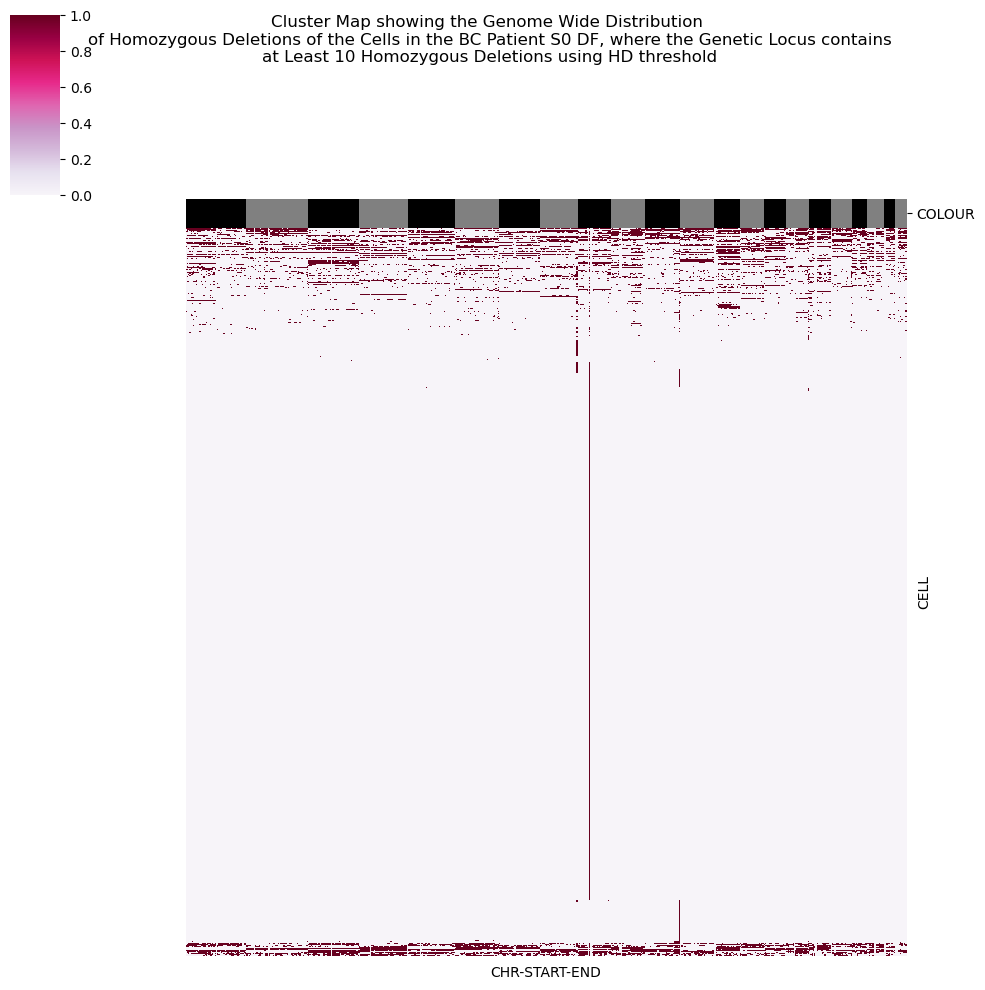

In [31]:
plt.figure(figsize=(12, 6))

HD_exp_heatmap = sns.clustermap(data=cells_w_HD_more_than_10_True_pivot, vmin=0, vmax=1, cmap='PuRd', xticklabels=False, yticklabels=False, 
                              col_cluster=False, row_cluster = True, col_colors=chrome_colours)
HD_exp_heatmap.ax_row_dendrogram.set_visible(False)
HD_exp_heatmap.fig.suptitle("""Cluster Map showing the Genome Wide Distribution 
of Homozygous Deletions of the Cells in the BC Patient S0 DF, where the Genetic Locus contains
at Least 10 Homozygous Deletions using HD threshold""")
HD_exp_heatmap


Making Freq. Plot

In [32]:
df

,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,CN_STATE,CHR,TOTAL_CN,COLOUR,HOMO_DEL
0,chr1,0,5000000,A-AAACCTGAGATCTGCT,2654972,1380,0.787923,25,46,0.647887,0,1|2,1,3,black,False
1,chr1,0,5000000,A-AAACCTGGTACCGCTG,2654972,545,1.046940,23,21,0.477273,0,1|1,1,2,black,False
2,chr1,0,5000000,A-AAACCTGGTGCTGTAT,2654972,881,1.210947,21,31,0.596154,0,1|1,1,2,black,False
3,chr1,0,5000000,A-AAACCTGTCCGCGGAT,2654972,1372,2.324741,34,54,0.613636,0,2|3,1,5,black,False
4,chr1,0,5000000,A-AAACGGGCATGTATGC,2654972,1019,1.166981,42,24,0.363636,0,1|1,1,2,black,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815136,chr22,50000000,50818468,E-TTTGTCAAGTAGATGT,488332,409,1.228689,3,3,0.500000,31,2|2,22,4,gray,False
2815137,chr22,50000000,50818468,E-TTTGTCACAATTCACG,488332,132,0.744681,2,7,0.777778,31,2|1,22,3,gray,False
2815138,chr22,50000000,50818468,E-TTTGTCATCGAAATCC,488332,212,0.866534,4,4,0.500000,31,1|1,22,2,gray,False
2815139,chr22,50000000,50818468,E-TTTGTCATCGAACAAA,488332,186,1.249646,3,3,0.500000,31,2|2,22,4,gray,False


In [33]:
df_prop_HD_threshold = df.groupby(['CHR', 'START', 'END'])['RDR'].apply(lambda rdrs: (rdrs <= 0.00389).sum()/len(rdrs)).reset_index().reset_index()
df_prop_HD_threshold.rename(columns={'RDR': 'PROP_HD'}, inplace= True)
df_prop_HD_threshold

,index,CHR,START,END,PROP_HD
0,0,1,0,5000000,0.000588
1,1,1,5000000,10000000,0.002254
2,2,1,10000000,15000000,0.001862
3,3,1,15000000,20000000,0.001764
4,4,1,20000000,25000000,0.002450
...,...,...,...,...,...
565,565,22,30000000,35000000,0.003039
566,566,22,35000000,40000000,0.001960
567,567,22,40000000,45000000,0.001960
568,568,22,45000000,50000000,0.002254


In [34]:
0.00389

0.00389

In [35]:
chromosome_pos = df_prop_HD_threshold.groupby('CHR')['index'].first()

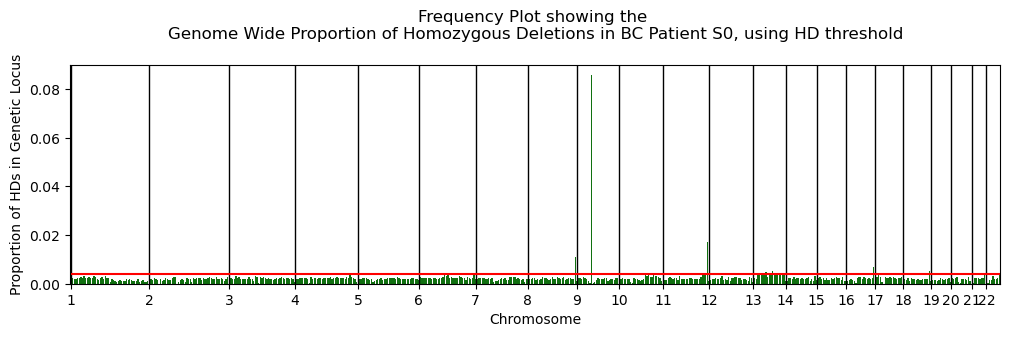

In [36]:

plt.figure(figsize=(12,3))

sns.barplot(x= df_prop_HD_threshold['index'], y=df_prop_HD_threshold['PROP_HD'], color= 'green')

plt.xticks(chromosome_pos.values, chromosome_pos.index)

for starting_pos in chromosome_pos.values:
    plt.axvline(x=starting_pos, linewidth=1.0, color='black', linestyle='-')

plt.axhline(y=0.003921, color='r', linestyle='-')


plt.ylim(0, 0.09)


plt.xlabel('Chromosome')

plt.ylabel('Proportion of HDs in Genetic Locus')

plt.title("""Frequency Plot showing the 
Genome Wide Proportion of Homozygous Deletions in BC Patient S0, using HD threshold
   """)

plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('FP_BC_P_S0_threshold.png', dpi=300)

In [40]:
x2 = df_prop_HD_threshold.nlargest(20, 'PROP_HD')

In [41]:
x2

,index,CHR,START,END,PROP_HD
319,319,9,45000000,50000000,0.085964
390,390,11,135000000,135086622,0.017055
309,309,8,145000000,145138636,0.011174
492,492,16,90000000,90338345,0.006861
526,526,18,80000000,80373285,0.005293
430,430,13,75000000,80000000,0.005195
426,426,13,55000000,60000000,0.004803
428,428,13,65000000,70000000,0.004411
431,431,13,80000000,85000000,0.004411
247,247,6,170000000,170805979,0.004313


In [57]:
doc = docx.Document()

t = doc.add_table(rows=x2.shape[0], cols=x2.shape[1])

for i in range(x2.shape[0]):
    for j in range(x2.shape[1]):
        cell = x2.iat[i, j]
        t.cell(i, j).text = str(cell)

doc.save('BC_P_S0_genes_table_threshold.docx')

In [58]:
df_prop_HD_05 = df.groupby(['CHR', 'START', 'END'])['RDR'].apply(lambda rdrs: (rdrs <= 0.05).sum()/len(rdrs)).reset_index().reset_index()
df_prop_HD_05.rename(columns={'RDR': 'PROP_HD'}, inplace= True)
df_prop_HD_05
df_prop_HD_10 = df.groupby(['CHR', 'START', 'END'])['RDR'].apply(lambda rdrs: (rdrs <= 0.10).sum()/len(rdrs)).reset_index().reset_index()
df_prop_HD_10.rename(columns={'RDR': 'PROP_HD'}, inplace= True)
df_prop_HD_10
df_prop_HD_15 = df.groupby(['CHR', 'START', 'END'])['RDR'].apply(lambda rdrs: (rdrs <= 0.15).sum()/len(rdrs)).reset_index().reset_index()
df_prop_HD_15.rename(columns={'RDR': 'PROP_HD'}, inplace= True)
df_prop_HD_15
df_prop_HD_30 = df.groupby(['CHR', 'START', 'END'])['RDR'].apply(lambda rdrs: (rdrs <= 0.30).sum()/len(rdrs)).reset_index().reset_index()
df_prop_HD_30.rename(columns={'RDR': 'PROP_HD'}, inplace= True)
df_prop_HD_30
df_prop_HD_40 = df.groupby(['CHR', 'START', 'END'])['RDR'].apply(lambda rdrs: (rdrs <= 0.40).sum()/len(rdrs)).reset_index().reset_index()
df_prop_HD_40.rename(columns={'RDR': 'PROP_HD'}, inplace= True)
df_prop_HD_40

,index,CHR,START,END,PROP_HD
0,0,1,0,5000000,0.007646
1,1,1,5000000,10000000,0.007253
2,2,1,10000000,15000000,0.007253
3,3,1,15000000,20000000,0.008332
4,4,1,20000000,25000000,0.008332
...,...,...,...,...,...
565,565,22,30000000,35000000,0.051755
566,566,22,35000000,40000000,0.007744
567,567,22,40000000,45000000,0.007646
568,568,22,45000000,50000000,0.006763


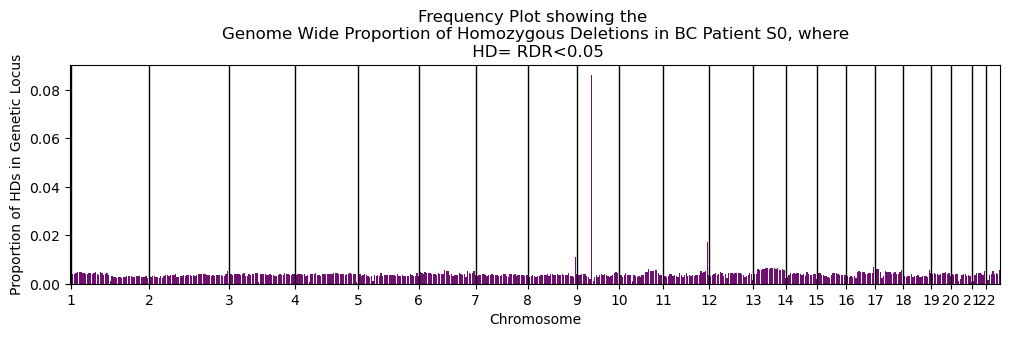

In [59]:
chromosome_pos = df_prop_HD_05.groupby('CHR')['index'].first()

plt.figure(figsize=(12,3))

sns.barplot(x= df_prop_HD_05['index'], y=df_prop_HD_05['PROP_HD'], color= 'purple')

plt.xticks(chromosome_pos.values, chromosome_pos.index)

for starting_pos in chromosome_pos.values:
    plt.axvline(x=starting_pos, linewidth=1.0, color='black', linestyle='-')

plt.xlabel('Chromosome')

plt.ylabel('Proportion of HDs in Genetic Locus')

plt.title("""Frequency Plot showing the 
Genome Wide Proportion of Homozygous Deletions in BC Patient S0, where
 HD= RDR<0.05""")

plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('FP_BC_P_S0_propHD_05.png', dpi=300)

In [60]:
df_prop_HD_05[df_prop_HD_05['PROP_HD'] > 0.01] #genomic regions at at a certain threshold

,index,CHR,START,END,PROP_HD
309,309,8,145000000,145138636,0.011174
319,319,9,45000000,50000000,0.085964
390,390,11,135000000,135086622,0.017252


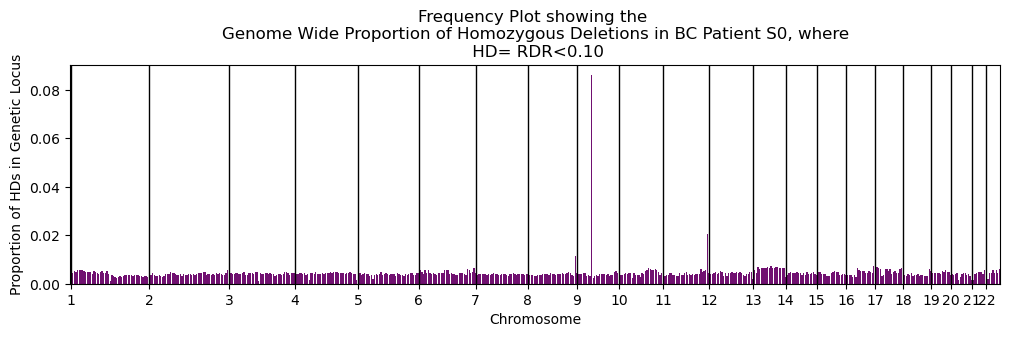

In [61]:
plt.figure(figsize=(12,3))

sns.barplot(x= df_prop_HD_10['index'], y=df_prop_HD_10['PROP_HD'], color= 'purple')

plt.xticks(chromosome_pos.values, chromosome_pos.index)

for starting_pos in chromosome_pos.values:
    plt.axvline(x=starting_pos, linewidth=1.0, color='black', linestyle='-')

plt.xlabel('Chromosome')

plt.ylabel('Proportion of HDs in Genetic Locus')

plt.title("""Frequency Plot showing the 
Genome Wide Proportion of Homozygous Deletions in BC Patient S0, where
 HD= RDR<0.10""")

plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('FP_BC_P_S0_propHD_10.png', dpi=300)

In [62]:
df_prop_HD_10[df_prop_HD_10['PROP_HD'] > 0.01] 

,index,CHR,START,END,PROP_HD
309,309,8,145000000,145138636,0.011566
319,319,9,45000000,50000000,0.085964
390,390,11,135000000,135086622,0.020682


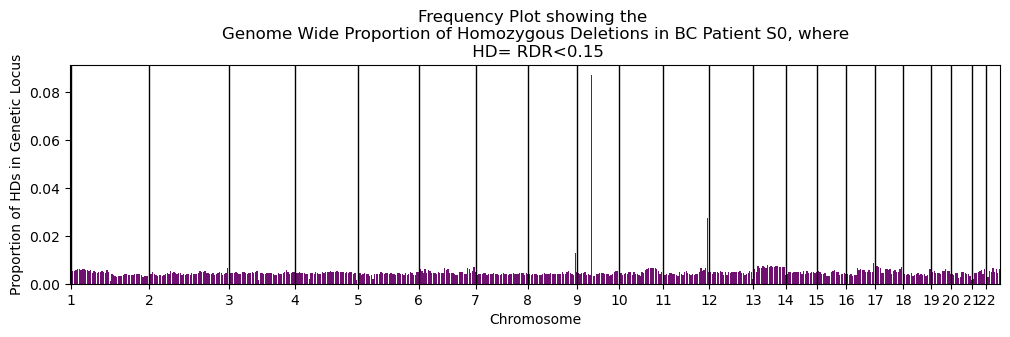

In [63]:
plt.figure(figsize=(12,3))

sns.barplot(x= df_prop_HD_15['index'], y=df_prop_HD_15['PROP_HD'], color= 'green')

plt.xticks(chromosome_pos.values, chromosome_pos.index)

for starting_pos in chromosome_pos.values:
    plt.axvline(x=starting_pos, linewidth=1.0, color='black', linestyle='-')

plt.axhline(y=0.004819, color='r', linestyle='-')


plt.ylim(0, 0.08)

plt.xlabel('Chromosome')

plt.ylabel('Proportion of HDs in Genetic Locus')

plt.title("""Frequency Plot showing the 
Genome Wide Proportion of Homozygous Deletions in BC Patient S0, where
 HD= RDR<0.15""")

plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('FP_BC_P_S0_propHD_15.png', dpi=300)

In [64]:
df_prop_HD_15[df_prop_HD_15['PROP_HD'] > 0.01] 

,index,CHR,START,END,PROP_HD
309,309,8,145000000,145138636,0.012939
319,319,9,45000000,50000000,0.087140
390,390,11,135000000,135086622,0.027446


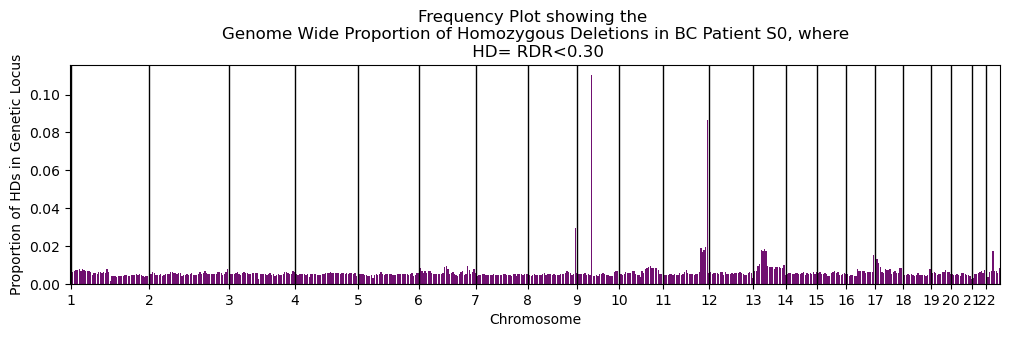

In [65]:
plt.figure(figsize=(12,3))

sns.barplot(x= df_prop_HD_30['index'], y=df_prop_HD_30['PROP_HD'], color= 'purple')

plt.xticks(chromosome_pos.values, chromosome_pos.index)

for starting_pos in chromosome_pos.values:
    plt.axvline(x=starting_pos, linewidth=1.0, color='black', linestyle='-')

plt.xlabel('Chromosome')

plt.ylabel('Proportion of HDs in Genetic Locus')

plt.title("""Frequency Plot showing the 
Genome Wide Proportion of Homozygous Deletions in BC Patient S0, where
 HD= RDR<0.30""")

plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('FP_BC_P_S0_propHD_30.png', dpi=300)


In [66]:
x2 = df_prop_HD_30[df_prop_HD_30['PROP_HD'] > 0.015] 

x2

,index,CHR,START,END,PROP_HD
309,309,8,145000000,145138636,0.029406
319,319,9,45000000,50000000,0.110272
386,386,11,115000000,120000000,0.018722
387,387,11,120000000,125000000,0.016565
388,388,11,125000000,130000000,0.017840
389,389,11,130000000,135000000,0.019310
390,390,11,135000000,135086622,0.086454
423,423,13,40000000,45000000,0.017840
424,424,13,45000000,50000000,0.017055
425,425,13,50000000,55000000,0.018330


In [67]:
x2 = df_prop_HD_30[df_prop_HD_30['PROP_HD'] > 0.015] 

doc = docx.Document()

t = doc.add_table(rows=x2.shape[0], cols=x2.shape[1])

for i in range(x2.shape[0]):
    for j in range(x2.shape[1]):
        cell = x2.iat[i, j]
        t.cell(i, j).text = str(cell)

doc.save('BC_P_S0_genes_table.docx')

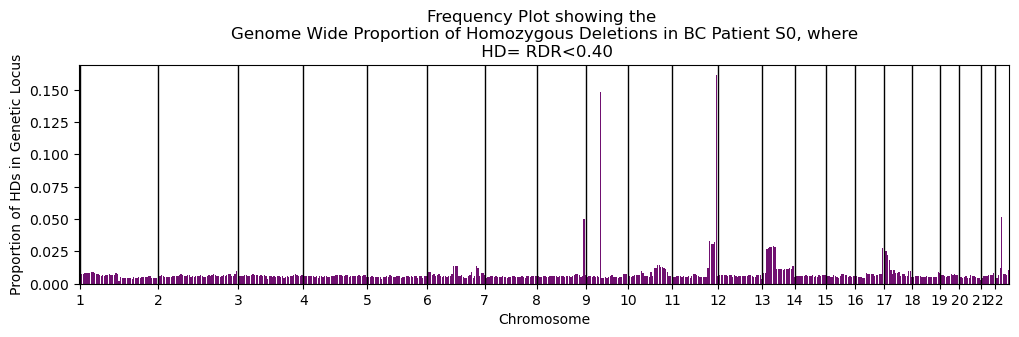

In [68]:
plt.figure(figsize=(12,3))

sns.barplot(x= df_prop_HD_40['index'], y=df_prop_HD_40['PROP_HD'], color= 'purple')

plt.xticks(chromosome_pos.values, chromosome_pos.index)

for starting_pos in chromosome_pos.values:
    plt.axvline(x=starting_pos, linewidth=1.0, color='black', linestyle='-')

plt.xlabel('Chromosome')

plt.ylabel('Proportion of HDs in Genetic Locus')

plt.title("""Frequency Plot showing the 
Genome Wide Proportion of Homozygous Deletions in BC Patient S0, where
 HD= RDR<0.40""")

plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('FP_BC_PS0_propHD_40.png', dpi=300)

In [69]:
df_prop_HD_40[df_prop_HD_40['PROP_HD'] > 0.01] 

,index,CHR,START,END,PROP_HD
229,229,6,80000000,85000000,0.013723
230,230,6,85000000,90000000,0.013331
231,231,6,90000000,95000000,0.013429
243,243,6,150000000,155000000,0.014017
244,244,6,155000000,160000000,0.012056
309,309,8,145000000,145138636,0.050186
319,319,9,45000000,50000000,0.148598
352,352,10,80000000,85000000,0.012154
353,353,10,85000000,90000000,0.012252
354,354,10,90000000,95000000,0.014213
